Environment setup

In [2]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta

Load Dataset

In [3]:
csv_path = "../data/cybersecurity_threat_detection_logs.csv"
Data_source_pl = pl.read_csv(csv_path)

Summary of Dataset

In [4]:
Data_source_pl.describe()

statistic,timestamp,source_ip,dest_ip,protocol,action,threat_label,log_type,bytes_transferred,user_agent,request_path
str,str,str,str,str,str,str,str,f64,str,str
"""count""","""6000000""","""6000000""","""6000000""","""6000000""","""6000000""","""6000000""","""6000000""",6e6,"""6000000""","""6000000"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0"""
"""mean""",null,null,null,null,null,null,null,25046.492221,null,null
"""std""",null,null,null,null,null,null,null,14401.631288,null,null
"""min""","""2024-01-01T00:00:00""","""103.172.167.96""","""192.168.1.1""","""FTP""","""allowed""","""benign""","""application""",100.0,"""Mozilla/5.0 (Macintosh; Intel …","""/"""
"""25%""",null,null,null,null,null,null,null,12584.0,null,null
"""50%""",null,null,null,null,null,null,null,25036.0,null,null
"""75%""",null,null,null,null,null,null,null,37519.0,null,null
"""max""","""2024-12-30T00:00:00""","""98.153.120.136""","""192.168.1.99""","""UDP""","""blocked""","""suspicious""","""ids""",50000.0,"""curl/7.64.1""","""/wp-login.php?sqlmap"""


In [5]:
Data_source_pl.head()

timestamp,source_ip,dest_ip,protocol,action,threat_label,log_type,bytes_transferred,user_agent,request_path
str,str,str,str,str,str,str,i64,str,str
"""2024-05-01T00:00:00""","""192.168.1.125""","""192.168.1.124""","""TCP""","""blocked""","""benign""","""firewall""",10889,"""Nmap Scripting Engine""","""/"""
"""2024-07-18T00:00:00""","""192.168.1.201""","""192.168.1.201""","""ICMP""","""blocked""","""benign""","""application""",36522,"""Nmap Scripting Engine""","""/"""
"""2024-04-07T00:00:00""","""192.168.1.248""","""192.168.1.15""","""HTTP""","""allowed""","""benign""","""application""",20652,"""Mozilla/5.0 (Windows NT 10.0; …","""/login"""
"""2024-10-26T00:00:00""","""192.168.1.236""","""192.168.1.219""","""HTTP""","""allowed""","""benign""","""application""",5350,"""Mozilla/5.0 (Macintosh; Intel …","""/login"""
"""2024-10-31T00:00:00""","""192.168.1.221""","""192.168.1.61""","""ICMP""","""allowed""","""benign""","""application""",40691,"""Mozilla/5.0 (Windows NT 10.0; …","""/"""


Findings : 

There wasn't any hour/minute/second level timestamp data. Only date level timestamp data was available. Hence, time series analysis cannot be performed on this dataset. 

There wasn't also any missing values in the dataset.

Column wise analysis

In [6]:
# Timestamp column analysis

#since the timestamp only contain date, then transform it to date 
Data_source_pl_1 = Data_source_pl.with_columns([
    pl.col('timestamp').str.strptime(pl.Datetime, format="%Y-%m-%dT%H:%M:%S").alias('timestamp')
])

Data_source_pl_1 = Data_source_pl_1.with_columns([
    pl.col('timestamp').dt.date().alias('date')
])

unique_dates = Data_source_pl_1.select(pl.col('date').unique().sort())
print(f"Total unique dates in the dataset: {unique_dates.height}")


start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
date_set = set(unique_dates['date'].to_list())
missing_dates = []

current_date = start_date
while current_date <= end_date:
    if current_date.date() not in date_set:
        missing_dates.append(current_date.date())
    current_date += timedelta(days=1)

print(f"Missing dates in the dataset: {missing_dates}")

Total unique dates in the dataset: 365
Missing dates in the dataset: [datetime.date(2024, 12, 31)]


2024, 12, 31 day is missing from the dataset.

In [7]:
# Unique source IP analysis
unique_source_ips = Data_source_pl.select(pl.col('source_ip').unique())
print(f"Total unique source IPs in the dataset: {unique_source_ips.height}")

# frequencies for each unique source IP
source_ip_frequencies = (
	Data_source_pl
	.group_by('source_ip')
	.agg(pl.len().alias('count'))
	.sort('count', descending=True)
)
print("All source IPs by frequency:")
for row in source_ip_frequencies.iter_rows():
    print(f"Source IP: {row[0]}, Count: {row[1]}")

Total unique source IPs in the dataset: 354
All source IPs by frequency:
Source IP: 59.211.9.207, Count: 18295
Source IP: 109.106.120.222, Count: 18273
Source IP: 88.72.40.56, Count: 18252
Source IP: 185.225.185.68, Count: 18239
Source IP: 122.63.201.122, Count: 18229
Source IP: 229.140.23.152, Count: 18203
Source IP: 44.137.187.63, Count: 18202
Source IP: 114.207.221.220, Count: 18193
Source IP: 61.72.172.125, Count: 18193
Source IP: 166.19.156.163, Count: 18178
Source IP: 109.9.8.24, Count: 18176
Source IP: 25.169.111.91, Count: 18173
Source IP: 55.139.34.186, Count: 18164
Source IP: 13.221.29.40, Count: 18146
Source IP: 187.14.173.168, Count: 18137
Source IP: 208.223.2.195, Count: 18133
Source IP: 19.182.162.16, Count: 18126
Source IP: 103.172.167.96, Count: 18126
Source IP: 144.138.68.192, Count: 18105
Source IP: 207.79.62.15, Count: 18105
Source IP: 240.226.147.148, Count: 18104
Source IP: 216.197.199.15, Count: 18100
Source IP: 55.234.242.146, Count: 18099
Source IP: 161.77.216.1

Assume 192 based IPs as internal network IPs and rest as external IPs.

In [8]:
# Destination IP analysis

unique_destination_ips = Data_source_pl.select(pl.col('dest_ip').unique())
print(f"Total unique destination IPs in the dataset: {unique_destination_ips.height}")

# frequencies for each unique destination IP
destination_ip_frequencies = (
    Data_source_pl  
    .group_by('dest_ip')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All destination IPs by frequency:")
for row in destination_ip_frequencies.iter_rows():
    print(f"Destination IP: {row[0]}, Count: {row[1]}")



Total unique destination IPs in the dataset: 254
All destination IPs by frequency:
Destination IP: 192.168.1.5, Count: 24140
Destination IP: 192.168.1.135, Count: 24121
Destination IP: 192.168.1.193, Count: 24091
Destination IP: 192.168.1.226, Count: 24042
Destination IP: 192.168.1.237, Count: 23972
Destination IP: 192.168.1.137, Count: 23944
Destination IP: 192.168.1.26, Count: 23941
Destination IP: 192.168.1.121, Count: 23910
Destination IP: 192.168.1.44, Count: 23909
Destination IP: 192.168.1.175, Count: 23901
Destination IP: 192.168.1.99, Count: 23896
Destination IP: 192.168.1.228, Count: 23894
Destination IP: 192.168.1.85, Count: 23891
Destination IP: 192.168.1.152, Count: 23885
Destination IP: 192.168.1.248, Count: 23882
Destination IP: 192.168.1.57, Count: 23881
Destination IP: 192.168.1.49, Count: 23871
Destination IP: 192.168.1.233, Count: 23870
Destination IP: 192.168.1.50, Count: 23856
Destination IP: 192.168.1.220, Count: 23855
Destination IP: 192.168.1.10, Count: 23842
Des

In [9]:
# Protocol Analysis

unique_protocols = Data_source_pl.select(pl.col('protocol').unique())
print(f"Total unique protocols in the dataset: {unique_protocols.height}")

# frequencies for each unique protocol
protocol_frequencies = (
    Data_source_pl
    .group_by('protocol')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All protocols by frequency:")
for row in protocol_frequencies.iter_rows():
    print(f"Protocol: {row[0]}, Count: {row[1]}")

Total unique protocols in the dataset: 7
All protocols by frequency:
Protocol: TCP, Count: 1497493
Protocol: HTTP, Count: 1201528
Protocol: HTTPS, Count: 1199970
Protocol: UDP, Count: 900422
Protocol: ICMP, Count: 599903
Protocol: SSH, Count: 300464
Protocol: FTP, Count: 300220


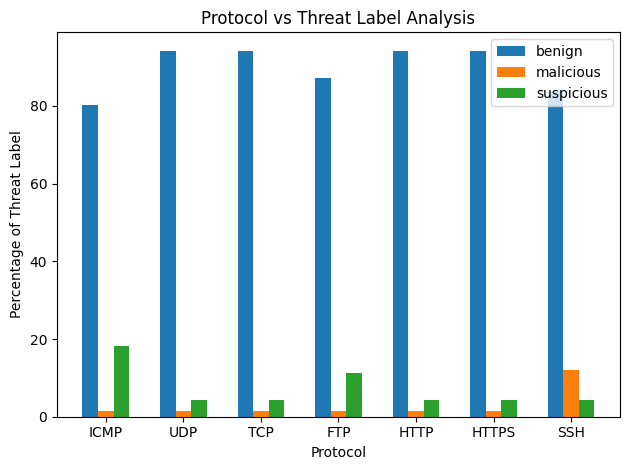

In [10]:
# Protocol vs Threat Label Analysis ,x axis for protocol, y axis for percentage of threat label and plot as a bar chart

protocol_threat_label = (
    Data_source_pl
    .group_by(['protocol', 'threat_label'])
    .agg(pl.len().alias('count'))
)

protocol_totals = (
    Data_source_pl
    .group_by('protocol')
    .agg(pl.len().alias('total_count'))
)
protocol_threat_label = protocol_threat_label.join(protocol_totals, on='protocol')  
protocol_threat_label = protocol_threat_label.with_columns([
    (pl.col('count') / pl.col('total_count') * 100).alias('percentage')
])

protocol_threat_label_df = protocol_threat_label.to_pandas()
protocols = protocol_threat_label_df['protocol'].unique()
threat_labels = protocol_threat_label_df['threat_label'].unique()
bar_width = 0.2
x = range(len(protocols))
for i, threat_label in enumerate(threat_labels):
    subset = protocol_threat_label_df[protocol_threat_label_df['threat_label'] == threat_label]
    percentages = []
    for protocol in protocols:
        row = subset[subset['protocol'] == protocol]
        if not row.empty:
            percentages.append(row['percentage'].values[0])
        else:
            percentages.append(0)
    plt.bar([p + i * bar_width for p in x], percentages, width=bar_width, label=threat_label)

plt.xlabel('Protocol')
plt.ylabel('Percentage of Threat Label')
plt.title('Protocol vs Threat Label Analysis')
plt.xticks([p + bar_width for p in x], protocols)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Action Analysis

unique_actions = Data_source_pl.select(pl.col('action').unique())
print(f"Total unique actions in the dataset: {unique_actions.height}")

# frequencies for each unique action
action_frequencies = (
    Data_source_pl
    .group_by('action')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All actions by frequency:")
for row in action_frequencies.iter_rows():
    print(f"Action: {row[0]}, Count: {row[1]}")

Total unique actions in the dataset: 2
All actions by frequency:
Action: allowed, Count: 3000646
Action: blocked, Count: 2999354


This pretty suspicious about like perfect splitting between blocked and allowed requests. 

In [12]:
# Threat Label Analysis

unique_threat_labels = Data_source_pl.select(pl.col('threat_label').unique())
print(f"Total unique threat labels in the dataset: {unique_threat_labels.height}")

# frequencies and percentages for each unique threat label
threat_label_frequencies = (
    Data_source_pl
    .group_by('threat_label')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
total_records = Data_source_pl.height
print("All threat labels by frequency and percentage:")
for row in threat_label_frequencies.iter_rows():
    percentage = (row[1] / total_records) * 100
    print(f"Threat Label: {row[0]}, Count: {row[1]}, Percentage: {percentage:.2f}%")

Total unique threat labels in the dataset: 3
All threat labels by frequency and percentage:
Threat Label: benign, Count: 5517611, Percentage: 91.96%
Threat Label: suspicious, Count: 360883, Percentage: 6.01%
Threat Label: malicious, Count: 121506, Percentage: 2.03%


In [13]:
# Log type analysis

unique_log_types = Data_source_pl.select(pl.col('log_type').unique())
print(f"Total unique log types in the dataset: {unique_log_types.height}")

# frequencies for each unique log type
log_type_frequencies = (
    Data_source_pl
    .group_by('log_type')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All log types by frequency:")    
for row in log_type_frequencies.iter_rows():
    print(f"Log Type: {row[0]}, Count: {row[1]}")

Total unique log types in the dataset: 3
All log types by frequency:
Log Type: application, Count: 2001768
Log Type: ids, Count: 1999556
Log Type: firewall, Count: 1998676


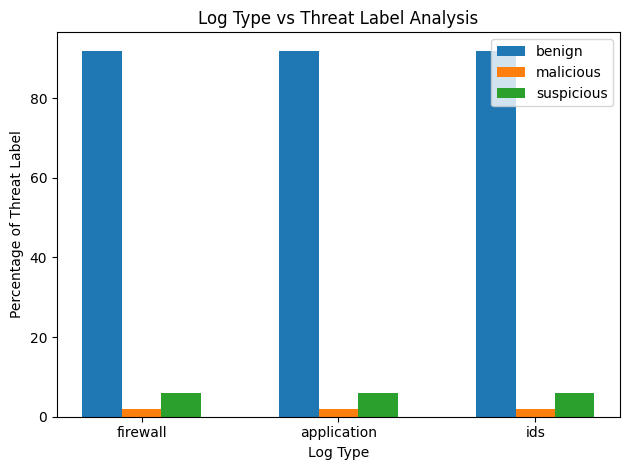

In [14]:
# log type vs threat label analysis, x axis for log type, y axis for percentage of threat label and plot as a bar chart

log_type_threat_label = (
    Data_source_pl
    .group_by(['log_type', 'threat_label'])
    .agg(pl.len().alias('count'))
)
log_type_totals = (
    Data_source_pl
    .group_by('log_type')
    .agg(pl.len().alias('total_count'))
)
log_type_threat_label = log_type_threat_label.join(log_type_totals, on='log_type')  
log_type_threat_label = log_type_threat_label.with_columns([
    (pl.col('count') / pl.col('total_count') * 100).alias('percentage')
])  
log_type_threat_label_df = log_type_threat_label.to_pandas()
log_types = log_type_threat_label_df['log_type'].unique()
threat_labels = log_type_threat_label_df['threat_label'].unique()
bar_width = 0.2
x = range(len(log_types))
for i, threat_label in enumerate(threat_labels):
    subset = log_type_threat_label_df[log_type_threat_label_df['threat_label'] == threat_label]
    percentages = []
    for log_type in log_types:
        row = subset[subset['log_type'] == log_type]
        if not row.empty:
            percentages.append(row['percentage'].values[0])
        else:
            percentages.append(0)
    plt.bar([p + i * bar_width for p in x], percentages, width=bar_width, label=threat_label)

plt.xlabel('Log Type')
plt.ylabel('Percentage of Threat Label')
plt.title('Log Type vs Threat Label Analysis')
plt.xticks([p + bar_width for p in x], log_types)
plt.legend()
plt.tight_layout()
plt.show()

Bytes Transferred Statistics:
shape: (9, 2)
┌────────────┬───────────────────┐
│ statistic  ┆ bytes_transferred │
│ ---        ┆ ---               │
│ str        ┆ f64               │
╞════════════╪═══════════════════╡
│ count      ┆ 6e6               │
│ null_count ┆ 0.0               │
│ mean       ┆ 25046.492221      │
│ std        ┆ 14401.631288      │
│ min        ┆ 100.0             │
│ 25%        ┆ 12584.0           │
│ 50%        ┆ 25036.0           │
│ 75%        ┆ 37519.0           │
│ max        ┆ 50000.0           │
└────────────┴───────────────────┘


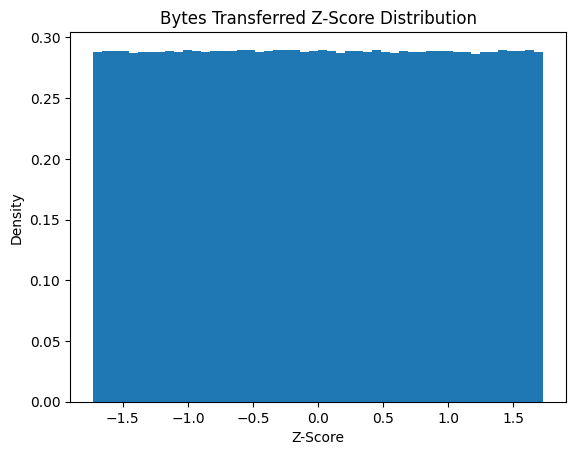

In [15]:
# Bytes transferred analysis

# since this is the only numerical column, perform some basic statistics on it

# summary statistics
bytes_stats = Data_source_pl.select('bytes_transferred').describe()
print("Bytes Transferred Statistics:")
print(bytes_stats)

#Distribution like plot by z score normalization
bytes_mean = Data_source_pl.select(pl.col('bytes_transferred').mean()).to_series()[0]
bytes_std = Data_source_pl.select(pl.col('bytes_transferred').std()).to_series()[0]
z_Data_source_pl = Data_source_pl.with_columns([
    ((pl.col('bytes_transferred') - bytes_mean) / bytes_std).alias('bytes_transferred_zscore')  
])  
plt.hist(z_Data_source_pl.select('bytes_transferred_zscore').to_series(), bins=50, density=True)
plt.title('Bytes Transferred Z-Score Distribution')
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.show()



<Figure size 1000x600 with 0 Axes>

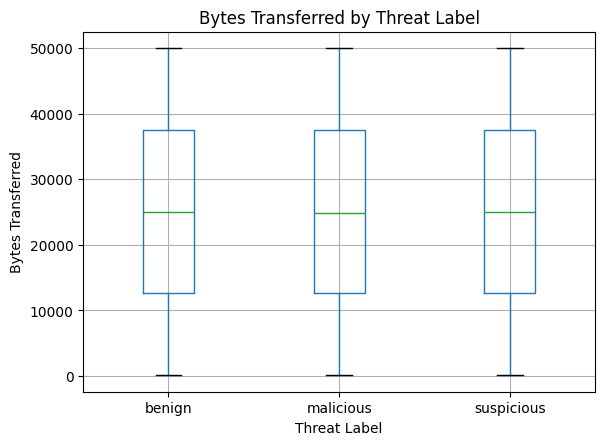

In [16]:
# box plot of bytes transferred by threat label
# x axis as threat labels : benign, suspicious, malicious
#y axis as bytes transferred

bytes_threat_label_df = Data_source_pl.select(['bytes_transferred', 'threat_label']).to_pandas()
plt.figure(figsize=(10, 6))
bytes_threat_label_df.boxplot(column='bytes_transferred', by='threat_label')
plt.title('Bytes Transferred by Threat Label')
plt.suptitle('')
plt.xlabel('Threat Label')
plt.ylabel('Bytes Transferred')
plt.show()

Z score distribution is failing here for this column.

In [17]:
# User agent analysis

unique_user_agents = Data_source_pl.select(pl.col('user_agent').unique())
print(f"Total unique user agents in the dataset: {unique_user_agents.height}")
# frequencies for each unique user agent
user_agent_frequencies = (
    Data_source_pl
    .group_by('user_agent')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All user agents by frequency:")
for row in user_agent_frequencies.iter_rows():
    print(f"User Agent: {row[0]}, Count: {row[1]}")

Total unique user agents in the dataset: 5
All user agents by frequency:
User Agent: curl/7.64.1, Count: 1200739
User Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36, Count: 1200722
User Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36, Count: 1200062
User Agent: Nmap Scripting Engine, Count: 1199655
User Agent: SQLMap/1.6-dev, Count: 1198822


In [18]:
# cross tabulation table of user agent vs threat label

user_agent_threat_label = Data_source_pl.select(['user_agent', 'threat_label']).to_pandas()
crosstab = pd.crosstab(user_agent_threat_label['user_agent'], user_agent_threat_label['threat_label'])
print("Cross Tabulation of User Agent vs Threat Label:")
print(crosstab)
 

Cross Tabulation of User Agent vs Threat Label:
threat_label                                         benign  malicious  \
user_agent                                                               
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)...  1104214      24244   
Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...  1104154      24187   
Nmap Scripting Engine                               1102426      24390   
SQLMap/1.6-dev                                      1102560      24323   
curl/7.64.1                                         1104257      24362   

threat_label                                        suspicious  
user_agent                                                      
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)...       71604  
Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...       72381  
Nmap Scripting Engine                                    72839  
SQLMap/1.6-dev                                           71939  
curl/7.64.1                                

In [19]:
# Request path analysis

unique_request_paths = Data_source_pl.select(pl.col('request_path').unique())
print(f"Total unique request paths in the dataset: {unique_request_paths.height}")
# frequencies for each unique request path
request_path_frequencies = (
    Data_source_pl
    .group_by('request_path')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)
print("All request paths by frequency:")
for row in request_path_frequencies.iter_rows():
    print(f"Request Path: {row[0]}, Count: {row[1]}")

Total unique request paths in the dataset: 228
All request paths by frequency:
Request Path: /, Count: 2741075
Request Path: /login, Count: 414760
Request Path: /admin/config, Count: 226796
Request Path: /secure, Count: 226412
Request Path: /auth, Count: 225761
Request Path: /api/v1/data, Count: 225575
Request Path: /api/login, Count: 189229
Request Path: /wp-login.php, Count: 188984
Request Path: /dashboard, Count: 188793
Request Path: /index.php, Count: 188675
Request Path: /admin, Count: 188194
Request Path: /files, Count: 65650
Request Path: /backup, Count: 65452
Request Path: /upload, Count: 65445
Request Path: /download, Count: 65432
Request Path: /home/user, Count: 62969
Request Path: /bin/bash, Count: 62893
Request Path: /etc/passwd, Count: 62815
Request Path: /root, Count: 62701
Request Path: /?phpmyadmin, Count: 42597
Request Path: /?backup.sql, Count: 42471
Request Path: /?..\..\etc\passwd, Count: 42457
Request Path: /?admin, Count: 42221
Request Path: /?login, Count: 42146


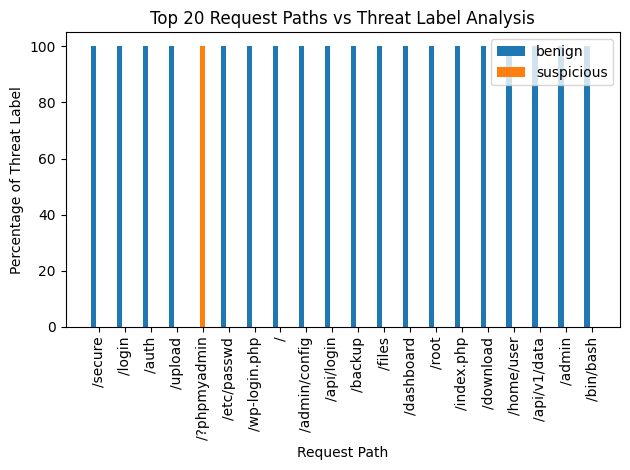

In [20]:
#get top 20 request paths by frequency and plot as a bar chart with request paths on x axis and percentages of each threat labels (benign,suspicious,malicious) on y axis

top_20_request_paths = request_path_frequencies.head(20).select('request_path').to_series().to_list()   
top_20_data = Data_source_pl.filter(pl.col('request_path').is_in(top_20_request_paths))
request_path_threat_label = (
    top_20_data
    .group_by(['request_path', 'threat_label'])
    .agg(pl.len().alias('count'))
)
request_path_totals = (
    top_20_data
    .group_by('request_path')
    .agg(pl.len().alias('total_count'))
)
request_path_threat_label = request_path_threat_label.join(request_path_totals, on='request_path')  
request_path_threat_label = request_path_threat_label.with_columns([
    (pl.col('count') / pl.col('total_count') * 100).alias('percentage')
])  
request_path_threat_label_df = request_path_threat_label.to_pandas()
request_paths = request_path_threat_label_df['request_path'].unique()
threat_labels = request_path_threat_label_df['threat_label'].unique()
bar_width = 0.2
x = range(len(request_paths))
for i, threat_label in enumerate(threat_labels):
    subset = request_path_threat_label_df[request_path_threat_label_df['threat_label'] == threat_label]
    percentages = []
    for request_path in request_paths:
        row = subset[subset['request_path'] == request_path]
        if not row.empty:
            percentages.append(row['percentage'].values[0])
        else:
            percentages.append(0)
    plt.bar([p + i * bar_width for p in x], percentages, width=bar_width, label=threat_label)   
plt.xlabel('Request Path')
plt.ylabel('Percentage of Threat Label')
plt.title('Top 20 Request Paths vs Threat Label Analysis')
plt.xticks([p + bar_width for p in x], request_paths, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# cross tabulation table of request path vs threat label for all request paths
# use pandas for this task 

request_path_threat_label = Data_source_pl.select(['request_path', 'threat_label']).to_pandas()
crosstab = pd.crosstab(request_path_threat_label['request_path'], request_path_threat_label['threat_label'])
print("Cross Tabulation of Request Path vs Threat Label:")
for row in crosstab.itertuples():
    print(row)


Cross Tabulation of Request Path vs Threat Label:
Pandas(Index='/', benign=2741075, malicious=0, suspicious=0)
Pandas(Index='/?..\\..\\etc\\passwd', benign=0, malicious=0, suspicious=42457)
Pandas(Index='/?/etc/passwd', benign=0, malicious=7499, suspicious=0)
Pandas(Index='/?DROP TABLE', benign=0, malicious=7543, suspicious=0)
Pandas(Index='/?UNION SELECT', benign=0, malicious=7497, suspicious=0)
Pandas(Index='/?admin', benign=0, malicious=0, suspicious=42221)
Pandas(Index='/?backup.sql', benign=0, malicious=0, suspicious=42471)
Pandas(Index='/?hydra', benign=0, malicious=7503, suspicious=0)
Pandas(Index='/?login', benign=0, malicious=0, suspicious=42146)
Pandas(Index='/?nmap', benign=0, malicious=7310, suspicious=0)
Pandas(Index='/?phpmyadmin', benign=0, malicious=0, suspicious=42597)
Pandas(Index='/?sqlmap', benign=0, malicious=7499, suspicious=0)
Pandas(Index='/admin', benign=188194, malicious=0, suspicious=0)
Pandas(Index='/admin/config', benign=226796, malicious=0, suspicious=0)
P

In [22]:
# get only the request paths that have malicious or suspicious threat labels
# and print them with their frequencies and percentages of each threat label

suspicious_malicious_paths = (
    Data_source_pl
    .filter(pl.col('threat_label').is_in(['suspicious', 'malicious']))
    .group_by('request_path', 'threat_label')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)

suspicious_only = suspicious_malicious_paths.filter(pl.col('threat_label') == 'suspicious')
malicious_only = suspicious_malicious_paths.filter(pl.col('threat_label') == 'malicious')

total_suspicious = suspicious_only.select(pl.col('count').sum()).to_series()[0]
total_malicious = malicious_only.select(pl.col('count').sum()).to_series()[0]
print("Request Paths with Suspicious Threat Label:")
for row in suspicious_only.iter_rows():
    percentage = (row[2] / total_suspicious) * 100
    print(f"Request Path: {row[0]}, Count: {row[2]}, Percentage: {percentage:.2f}%")

print("Request Paths with Malicious Threat Label:")
for row in malicious_only.iter_rows():
    percentage = (row[2] / total_malicious) * 100
    print(f"Request Path: {row[0]}, Count: {row[2]}, Percentage: {percentage:.2f}%")


#for only malicious request paths, get the top 20 common source IPs that accessed those paths and top 20 destination IPs that were targeted by those paths

malicious_data = Data_source_pl.filter(pl.col('threat_label') == 'malicious')
top_20_source_ips = (
    malicious_data
    .group_by('source_ip')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
    .head(20)
)
print("Top 20 Source IPs accessing Malicious Request Paths:")
for row in top_20_source_ips.iter_rows():
    print(f"Source IP: {row[0]}, Count: {row[1]}")

top_20_destination_ips = (
    malicious_data
    .group_by('dest_ip')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
    .head(20)
)
print("Top 20 Destination IPs targeted by Malicious Request Paths:")
for row in top_20_destination_ips.iter_rows():
    print(f"Destination IP: {row[0]}, Count: {row[1]}")

# # for only malicious how top 20 source IPs which starts only with '192', then get their frequencies accessing malicious request paths
malicious_data_192 = malicious_data.filter(pl.col('source_ip').str.starts_with('192'))
top_20_source_ips_192 = (
    malicious_data_192
    .group_by('source_ip')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
    .head(20)
)
print("Top 20 Source IPs starting with '192' accessing Malicious Request Paths:")
for row in top_20_source_ips_192.iter_rows():
    print(f"Source IP: {row[0]}, Count: {row[1]}")

Request Paths with Suspicious Threat Label:
Request Path: /?phpmyadmin, Count: 42597, Percentage: 11.80%
Request Path: /?backup.sql, Count: 42471, Percentage: 11.77%
Request Path: /?..\..\etc\passwd, Count: 42457, Percentage: 11.76%
Request Path: /?admin, Count: 42221, Percentage: 11.70%
Request Path: /?login, Count: 42146, Percentage: 11.68%
Request Path: /login?backup.sql, Count: 3846, Percentage: 1.07%
Request Path: /login?admin, Count: 3815, Percentage: 1.06%
Request Path: /login?..\..\etc\passwd, Count: 3811, Percentage: 1.06%
Request Path: /login?phpmyadmin, Count: 3780, Percentage: 1.05%
Request Path: /login?login, Count: 3650, Percentage: 1.01%
Request Path: /api/v1/data?phpmyadmin, Count: 2117, Percentage: 0.59%
Request Path: /admin/config?backup.sql, Count: 2095, Percentage: 0.58%
Request Path: /auth?admin, Count: 2093, Percentage: 0.58%
Request Path: /admin/config?login, Count: 2084, Percentage: 0.58%
Request Path: /api/v1/data?admin, Count: 2076, Percentage: 0.58%
Request P

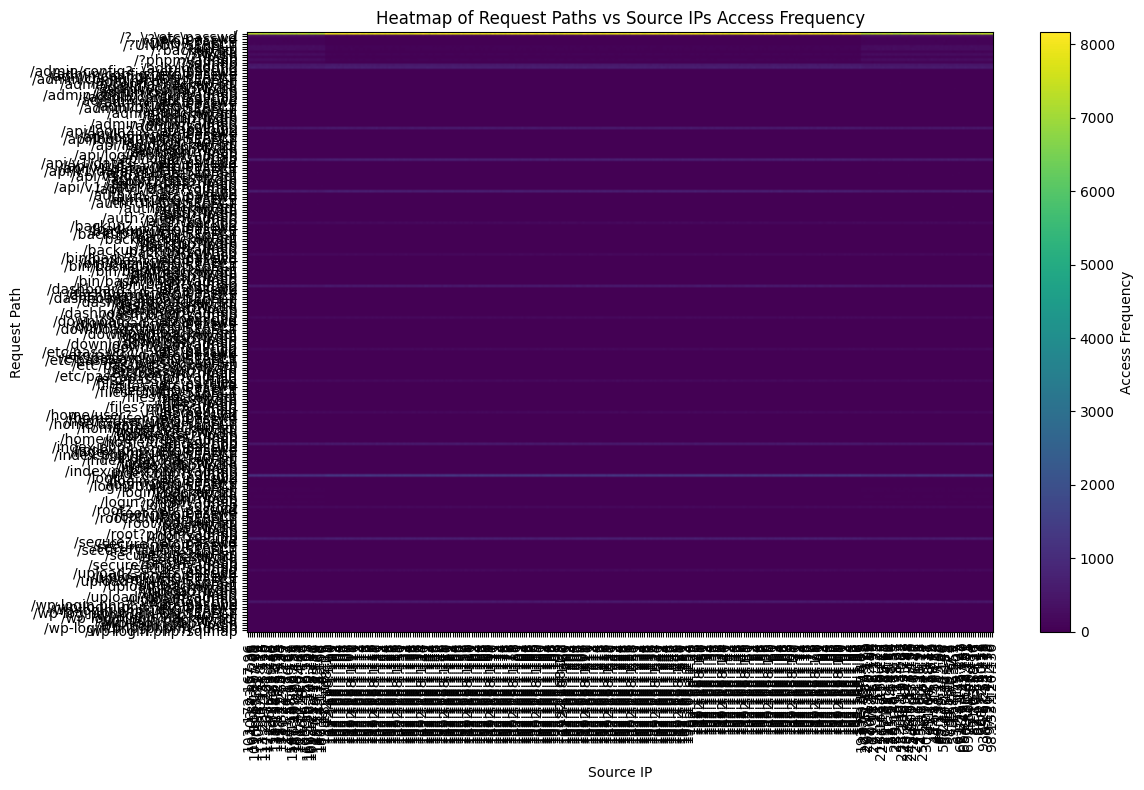

In [23]:
# create a heatmap where the rows represent different request paths and the columns represent different source IPs. The cell values would indicate how many times that source IP accessed that particular request path, and the color intensity would show the frequency.

heatmap_data = (
    Data_source_pl
    .group_by(['request_path', 'source_ip'])
    .agg(pl.len().alias('count'))
)
heatmap_df = heatmap_data.to_pandas()
heatmap_pivot = heatmap_df.pivot(index='request_path', columns='source_ip', values='count').fillna(0)
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_pivot, aspect='auto', cmap='viridis')
plt.colorbar(label='Access Frequency')
plt.xlabel('Source IP')
plt.ylabel('Request Path')
plt.title('Heatmap of Request Paths vs Source IPs Access Frequency')
plt.xticks(ticks=range(len(heatmap_pivot.columns)), labels=heatmap_pivot.columns, rotation=90)
plt.yticks(ticks=range(len(heatmap_pivot.index)), labels=heatmap_pivot.index)
plt.tight_layout()
plt.show()  

In [ ]:
# source ip column set to source_ip_type for internal or external and internal if starts with '192.168.' else external

Data_source_pl_2 = Data_source_pl.with_columns([
    pl.when(pl.col('source_ip').str.starts_with('192.'))
    .then(pl.lit('internal'))
    .otherwise(pl.lit('external'))
    .alias('source_ip_type')
])

# Correlation analysis between categorical columns and threat label including source_ip_type column

Data_source_pl_2 = Data_source_pl.with_columns([
    pl.when(pl.col('source_ip').str.starts_with('192.'))
    .then(pl.lit('internal'))
    .otherwise(pl.lit('external'))
    .alias('source_ip_type')
])
